In [69]:
%load_ext autoreload
%autoreload 2
from pathlib import Path
from skimage.io import imread
import matplotlib.pyplot as plt
import pigleg_cv
import shutil

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [37]:
!pwd

/webapps/piglegsurgery/piglegcv


In [38]:
import torch
torch.cuda.is_available()

True

In [39]:
!nvidia-smi

Wed Dec 13 16:12:24 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.103.01   Driver Version: 470.103.01   CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  On   | 00000000:42:00.0 Off |                  N/A |
|  0%   39C    P8     9W / 250W |   2592MiB / 11175MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [40]:
torch.__version__

'1.12.0a0+8a1a93a'

In [41]:
Path("~/.cache/torch/hub/checkpoints/").expanduser().exists()

True

In [42]:
!ls ~/.cache/torch/hub/checkpoints/

yolox_x_8x8_300e_coco_20211126_140254-1ef88d67.pth


In [12]:
# pip install mmcv-full

# Run whole video processing

In [72]:
outputdir = "./del_test_video_output/"

In [103]:
patch = "*/Anasto*.mp4"
# patch = "*/2023_10_11_B-Grübbel_Mareike_Fortlaufende_Transkutannaht.mov"
patch = "*/Einzel.MOV"
patch = "*/*test_4.mp4"
patch = "*/*micro_01*.mp4"
patch = "*/2023_10_11_B_Seltmann_Charlotte_fortlaufende_Transcutannaht.mp4"
patch = "Katharina_Einzelknopfnaht"
is_microsurgery = False
test_first_seconds=False
n_stitches = 3

img_pths = list(Path("../piglegsurgeryweb/media/upload/").glob(f"*/*{patch}*"))
img_pths[0]

PosixPath('../piglegsurgeryweb/media/upload/20220707-190320_Good-03_11_2021_B_Holzmu_ller_Katharina_Einzelknopfnaht_7ba22f6773dc133ce7a06321ee9f507b9cb0f653/Good-03_11_2021_B_Holzmu_ller_Katharina_Einzelknopfnaht.mp4')

In [110]:
# this is to test it on processed video
outputdir = Path("del_test_video_output_copy")
shutil.rmtree(outputdir, ignore_errors=True)
patch = "2023_10_11_B_Seltmann_Charlotte_fortlaufende_Transcutannaht.mp4"
patch = "Katharina_Einzelknopfnaht"
img_pths = list(Path("../piglegsurgeryweb/media/").glob(f"**/*{patch}*.zip"))
print(img_pths)
shutil.copytree(str(img_pths[0].parent), str(outputdir))

outputdir = list(outputdir.glob("*/*"))[0].parent

img_pths = list(Path("../piglegsurgeryweb/media/upload/").glob(f"*/*{patch}*"))
print(img_pths[0])
# img_pths[0].parent
# outputdir = Path("/webapps/piglegsurgery/piglegsurgeryweb/media/SA_20231011-191116_doqinglbsdnj").glob("**/*")
# list(outputdir)
outputdir

[PosixPath('../piglegsurgeryweb/media/SA_20220707-190320_tl4ev95290pp/SA_20220707-190320Good-03_11_2021_B_Holzmu_ller_Katharina_Einzelknopfnaht.mp4.zip')]
../piglegsurgeryweb/media/upload/20220707-190320_Good-03_11_2021_B_Holzmu_ller_Katharina_Einzelknopfnaht_7ba22f6773dc133ce7a06321ee9f507b9cb0f653/Good-03_11_2021_B_Holzmu_ller_Katharina_Einzelknopfnaht.mp4


PosixPath('del_test_video_output_copy/SA_20220707-190320')

# Do it per partes

2023-12-14 14:57:38.040 | DEBUG    | run_perpendicular:get_frame_to_process:162 - 6177
2023-12-14 14:57:38.122 | DEBUG    | pigleg_cv:get_parameters_for_crop_rotate_rescale:229 - device=cuda
/home/appuser/mmdetection/mmdet/datasets/utils.py:66: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  warnings.warn(
2023-12-14 14:57:38.353 | DEBUG    | run_qr:get_bboxes:37 - [[     1328.5      287.58      1485.1      451.83     0.97808]
 [     108.18      43.064      1538.2      1173.1     0.15091]
 [     240.01      545.99      1587.6      1175.6    0.097176]]
2023-12-14 14:57:38.518 | DEBUG    | run_qr:bbox_info_extraction_from_frame:80 - qr code text = 'QR scale pigleg'
2023-12-14 14:57:38.520 | DEBUG    | run_qr:bbox_info_extraction_from_frame:148 - {'bbox_scene_area': [199.8336181640625,
                     51.34346008300781,
                     1767.58

Fusing layers... 
IDetect.fuse
load checkpoint from local path: /webapps/piglegsurgery/piglegcv/resources/incision_detection_models/220326_234659_mmdet.pth


2023-12-14 14:57:39,040 - /webapps/piglegsurgery/piglegcv/incision_detection_mmdet.py - DEBUG - number of detected incisions = 0
2023-12-14 14:57:39.042 | DEBUG    | pigleg_cv:get_parameters_for_crop_rotate_rescale:240 - {'bbox_scene_area': [199.8336181640625,
                     51.34346008300781,
                     1767.5875244140625,
                     1151.5894775390625,
                     0.3984905481338501],
 'box': [[1329, 345], [1384, 445], [1483, 392], [1428, 294]],
 'incision_bboxes': [],
 'incision_bboxes_old': [],
 'is_detected': True,
 'pix_size': 0.0002365782953426947,
 'pix_size_method': 'QR',
 'pix_size_single_frame_detector_m': 0.00023456986295201842,
 'qr_bboxes_SFD': [[1328.474365234375,
                    287.58404541015625,
                    1485.0692138671875,
                    451.825927734375,
                    0.9780839085578918]],
 'qr_scissors_frame_detected': False,
 'qr_scissors_frames': [],
 'qr_size': 0.027,
 'size_by_scene': 0.00015625,
 't

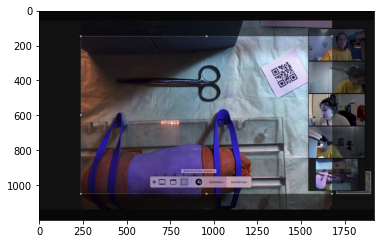

In [111]:

# pigleg_cv.do_computer_vision(img_pths[0], outputdir , meta=None)
dcv = pigleg_cv.DoComputerVision(
    img_pths[0], outputdir, test_first_seconds=test_first_seconds, is_microsurgery=is_microsurgery,
    n_stitches=n_stitches
)
dcv._make_sure_media_is_cropped()
plt.imshow(dcv.frame)
# dcv.run_image_processing()
# dcv._run_tracking()
# dcv._make_report()
# dcv._save_results()

In [107]:
dcv.frame

array(None, dtype=object)

In [ ]:
dcv._run_tracking()

In [ ]:
dcv._make_report()
dcv._save_results()

### Check the parameters for rotate and crop

2023-12-14 20:54:36.557 | DEBUG    | run_perpendicular:get_frame_to_process:162 - 6177
2023-12-14 20:54:36.635 | DEBUG    | pigleg_cv:get_parameters_for_crop_rotate_rescale:235 - device=cuda
/home/appuser/mmdetection/mmdet/datasets/utils.py:66: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  warnings.warn(
2023-12-14 20:54:36.897 | DEBUG    | run_qr:get_bboxes:41 - [[     1328.5      287.58      1485.1      451.83     0.97808]
 [     108.18      43.064      1538.2      1173.1     0.15091]
 [     240.01      545.99      1587.6      1175.6    0.097176]]
2023-12-14 20:54:37.065 | DEBUG    | run_qr:bbox_info_extraction_from_frame:81 - qr code text = 'QR scale pigleg'
2023-12-14 20:54:37.067 | DEBUG    | run_qr:bbox_info_extraction_from_frame:149 - {'bbox_scene_area': [199.8336181640625,
                     51.34346008300781,
                     1767.58

Fusing layers... 
IDetect.fuse
load checkpoint from local path: /webapps/piglegsurgery/piglegcv/resources/incision_detection_models/220326_234659_mmdet.pth


2023-12-14 20:54:37,607 - /webapps/piglegsurgery/piglegcv/incision_detection_mmdet.py - DEBUG - number of detected incisions = 0
2023-12-14 20:54:37.609 | DEBUG    | pigleg_cv:get_parameters_for_crop_rotate_rescale:246 - {'bbox_scene_area': [199.8336181640625,
                     51.34346008300781,
                     1767.5875244140625,
                     1151.5894775390625,
                     0.3984905481338501],
 'box': [[1329, 345], [1384, 445], [1483, 392], [1428, 294]],
 'incision_bboxes': [],
 'incision_bboxes_old': [],
 'is_detected': True,
 'pix_size': 0.0002365782953426947,
 'pix_size_method': 'QR',
 'pix_size_single_frame_detector_m': 0.00023456986295201842,
 'qr_bboxes_SFD': [[1328.474365234375,
                    287.58404541015625,
                    1485.0692138671875,
                    451.825927734375,
                    0.9780839085578918]],
 'qr_scissors_frame_detected': False,
 'qr_scissors_frames': [],
 'qr_size': 0.027,
 'size_by_scene': 0.00015625,
 't

{'pix_size_method': 'QR',
 'is_detected': True,
 'box': [[1329, 345], [1384, 445], [1483, 392], [1428, 294]],
 'pix_size': 0.0002365782953426947,
 'incision_bboxes': [],
 'qr_size': 0.027,
 'size_by_scene': 0.00015625,
 'text': 'QR scale pigleg',
 'pix_size_single_frame_detector_m': 0.00023456986295201842,
 'bbox_scene_area': [199.8336181640625,
  51.34346008300781,
  1767.5875244140625,
  1151.5894775390625,
  0.3984905481338501],
 'qr_scissors_frame_detected': False,
 'qr_bboxes_SFD': [[1328.474365234375,
   287.58404541015625,
   1485.0692138671875,
   451.825927734375,
   0.9780839085578918]],
 'qr_scissors_frames': [],
 'incision_bboxes_old': []}

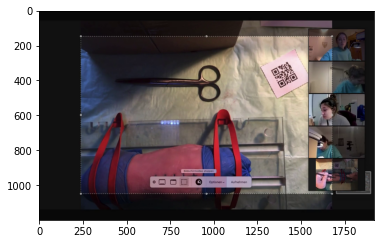

In [115]:

qr_data = dcv.get_parameters_for_crop_rotate_rescale()
plt.imshow(dcv.frame[:,:,::-1])
qr_data

In [123]:
dcv.filename = dcv.filename_original
dcv.outputdir

PosixPath('del_test_video_output_copy/SA_20220707-190320')

2023-12-14 21:58:23.612 | DEBUG    | pigleg_cv:get_parameters_for_crop_rotate_rescale:247 - device=cuda
2023-12-14 21:58:23.630 | DEBUG    | run_perpendicular:get_frame_to_process:166 - 6177
/home/appuser/mmdetection/mmdet/datasets/utils.py:66: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  warnings.warn(
2023-12-14 21:58:23.955 | DEBUG    | run_qr:get_bboxes:41 - [[     1328.5      287.58      1485.1      451.83     0.97808]
 [     108.18      43.064      1538.2      1173.1     0.15091]
 [     240.01      545.99      1587.6      1175.6    0.097176]]
2023-12-14 21:58:24.425 | DEBUG    | run_qr:bbox_info_extraction_from_frame:81 - qr code text = 'QR scale pigleg'
2023-12-14 21:58:24.428 | DEBUG    | run_qr:bbox_info_extraction_from_frame:149 - {'bbox_scene_area': [199.8336181640625,
                     51.34346008300781,
                     1767.58

Fusing layers... 
IDetect.fuse


2023-12-14 21:58:24.736 | DEBUG    | run_qr:get_bboxes:41 - [[     1328.3      287.36      1485.4      452.05     0.97652]
 [      169.1      70.752      1562.6      1183.3     0.15209]
 [     252.07       594.7        1297      1178.2     0.11663]]
2023-12-14 21:58:24.905 | DEBUG    | run_qr:bbox_info_extraction_from_frame:81 - qr code text = 'QR scale pigleg'
2023-12-14 21:58:24.907 | DEBUG    | run_qr:bbox_info_extraction_from_frame:149 - {'bbox_scene_area': [224.78338623046875,
                     55.20570373535156,
                     1595.5701904296875,
                     1148.9517822265625,
                     0.4195505678653717],
 'box': [[1329, 345], [1384, 445], [1484, 392], [1428, 293]],
 'incision_bboxes': [],
 'is_detected': True,
 'pix_size': 0.0002365782953426947,
 'pix_size_method': 'QR',
 'pix_size_single_frame_detector_m': 0.00023486253771573708,
 'qr_bboxes_SFD': [[1328.322509765625,
                    287.3583068847656,
                    1485.363525390625,
 

Fusing layers... 
IDetect.fuse


2023-12-14 21:58:25.214 | DEBUG    | run_qr:get_bboxes:41 - [[     1328.4      287.37      1485.3      451.91     0.97589]
 [     111.26      45.528      1535.6        1174     0.15299]
 [     251.56      593.65      1299.8      1179.3     0.11767]]
2023-12-14 21:58:25.377 | DEBUG    | run_qr:bbox_info_extraction_from_frame:81 - qr code text = 'QR scale pigleg'
2023-12-14 21:58:25.379 | DEBUG    | run_qr:bbox_info_extraction_from_frame:149 - {'bbox_scene_area': [229.44712829589844,
                     32.0108642578125,
                     1560.897705078125,
                     1177.0782470703125,
                     0.39952459931373596],
 'box': [[1329, 345], [1384, 445], [1484, 392], [1427, 293]],
 'incision_bboxes': [],
 'is_detected': True,
 'pix_size': 0.0002365782953426947,
 'pix_size_method': 'QR',
 'pix_size_single_frame_detector_m': 0.0002350760815128885,
 'qr_bboxes_SFD': [[1328.3602294921875,
                    287.37261962890625,
                    1485.31640625,
     

Fusing layers... 
IDetect.fuse


2023-12-14 21:58:25.685 | DEBUG    | run_qr:get_bboxes:41 - [[       1329      289.24      1483.4      450.37     0.98092]
 [     165.65      70.152      1560.2      1180.6     0.15171]
 [     271.72      593.13      1143.2      1176.3    0.068642]]
2023-12-14 21:58:25.844 | DEBUG    | run_qr:bbox_info_extraction_from_frame:81 - qr code text = 'QR scale pigleg'
2023-12-14 21:58:25.846 | DEBUG    | run_qr:bbox_info_extraction_from_frame:149 - {'bbox_scene_area': [219.70486450195312,
                     52.792327880859375,
                     1554.739013671875,
                     1168.380615234375,
                     0.4208371043205261],
 'box': [[1329, 345], [1384, 446], [1483, 392], [1427, 295]],
 'incision_bboxes': [],
 'is_detected': True,
 'pix_size': 0.00023477373272987406,
 'pix_size_method': 'QR',
 'pix_size_single_frame_detector_m': 0.00023411089077563418,
 'qr_bboxes_SFD': [[1329.015869140625,
                    289.2392883300781,
                    1483.3677978515625,


Fusing layers... 
IDetect.fuse


2023-12-14 21:58:26.175 | DEBUG    | run_qr:get_bboxes:41 - [[     1328.7      286.99      1485.5      451.62      0.9761]
 [     235.35      2.2842        1721      1106.6     0.15683]
 [     166.61      512.38      1402.6      1184.8      0.1268]]
2023-12-14 21:58:26.348 | DEBUG    | run_qr:bbox_info_extraction_from_frame:81 - qr code text = 'QR scale pigleg'
2023-12-14 21:58:26.350 | DEBUG    | run_qr:bbox_info_extraction_from_frame:149 - {'bbox_scene_area': [230.18495178222656,
                     45.01597595214844,
                     1558.912109375,
                     1175.4052734375,
                     0.43627968430519104],
 'box': [[1329, 345], [1384, 445], [1483, 392], [1427, 293]],
 'incision_bboxes': [[613.271484375,
                      901.325927734375,
                      938.23974609375,
                      1012.3321533203125,
                      0.8951320052146912]],
 'is_detected': True,
 'pix_size': 0.0002365782953426947,
 'pix_size_method': 'QR',
 'pix_s

Fusing layers... 
IDetect.fuse
load checkpoint from local path: /webapps/piglegsurgery/piglegcv/resources/incision_detection_models/220326_234659_mmdet.pth


2023-12-14 21:58:26,917 - /webapps/piglegsurgery/piglegcv/incision_detection_mmdet.py - DEBUG - number of detected incisions = 1
2023-12-14 21:58:26.919 | DEBUG    | pigleg_cv:get_parameters_for_crop_rotate_rescale:258 - {'bbox_scene_area': [230.18495178222656,
                     45.01597595214844,
                     1558.912109375,
                     1175.4052734375,
                     0.43627968430519104],
 'box': [[1329, 345], [1384, 445], [1483, 392], [1427, 293]],
 'incision_bboxes': [[613.271484375,
                      901.325927734375,
                      938.23974609375,
                      1012.3321533203125,
                      0.8951320052146912]],
 'incision_bboxes_old': [[611.1397705078125,
                          898.7380981445312,
                          925.5891723632812,
                          1020.3345947265625,
                          0.9957913160324097]],
 'is_detected': True,
 'pix_size': 0.0002365782953426947,
 'pix_size_method': 'QR',
 'p

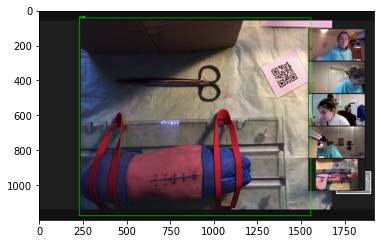

In [138]:
dcv.filename_cropped = None
dcv.filename = dcv.filename_original
dcv._make_sure_media_is_cropped()
# fn = dcv.do_crop_rotate_rescale(qr_data["bbox_scene_area"], qr_data["incision_bboxes"])
# img = pigleg_cv.get_frame_to_process(fn)
plt.imshow(dcv.frame[:,:,::-1])

In [62]:
Path(outputdir).absolute()

PosixPath('/webapps/piglegsurgery/piglegcv/del_test_video_output')

### Find splits

In [144]:
dcv._load_meta()
dcv.run_image_processing()
split_frames = dcv._find_stitch_ends_in_tracks(n_clusters=n_stitches, plot_clusters=True)
plt.figure()
plt.imshow(dcv.frame)
print(dcv.meta)
split_frames

2023-12-14 22:22:23.965 | DEBUG    | pigleg_cv:run_image_processing:127 - Running image processing...
2023-12-14 22:22:23.972 | DEBUG    | run_perpendicular:get_frame_to_process:166 - 6177
2023-12-14 22:22:24.244 | DEBUG    | run_qr:get_bboxes:41 - [[     497.98      108.62      556.64      168.74     0.98024]
 [     36.961      18.788      576.02      446.65      0.1343]
 [     83.842      208.97      490.15      441.69     0.11363]]
2023-12-14 22:22:24.399 | DEBUG    | run_qr:bbox_info_extraction_from_frame:81 - qr code text = 'QR scale pigleg'
2023-12-14 22:22:24.401 | DEBUG    | run_qr:bbox_info_extraction_from_frame:149 - {'pix_size_method': 'QR', 'is_detected': True, 'box': [[498, 129], [519, 167], [556, 147], [535, 110]], 'pix_size': 0.0006218821436015863, 'incision_bboxes': [], 'qr_size': 0.027, 'size_by_scene': 0.00041666666666666664, 'text': 'QR scale pigleg', 'pix_size_single_frame_detector_m': 0.0006158671965173156, 'bbox_scene_area': [70.35143280029297, 15.47702407836914, 

Fusing layers... 
IDetect.fuse


2023-12-14 22:22:24.656 | DEBUG    | run_qr:get_bboxes:41 - [[     497.98      108.61      556.67      168.73     0.98006]
 [     38.188      19.108       576.7      446.15     0.13706]
 [     94.357      219.44      425.12      441.25    0.064228]]
2023-12-14 22:22:24.803 | DEBUG    | run_qr:bbox_info_extraction_from_frame:81 - qr code text = 'QR scale pigleg'
2023-12-14 22:22:24.805 | DEBUG    | run_qr:bbox_info_extraction_from_frame:149 - {'pix_size_method': 'QR', 'is_detected': True, 'box': [[498, 129], [519, 167], [556, 147], [535, 110]], 'pix_size': 0.0006218821436015863, 'incision_bboxes': [], 'qr_size': 0.027, 'size_by_scene': 0.00041666666666666664, 'text': 'QR scale pigleg', 'pix_size_single_frame_detector_m': 0.0006160274742549718, 'bbox_scene_area': [71.2433853149414, 15.643844604492188, 672.4984130859375, 422.2715759277344, 0.4020305871963501], 'qr_scissors_frame_detected': False, 'qr_bboxes_SFD': [[497.9844970703125, 108.60578918457031, 556.6707153320312, 168.732696533203

Fusing layers... 
IDetect.fuse


2023-12-14 22:22:25.059 | DEBUG    | run_qr:get_bboxes:41 - [[     497.97       108.6      556.71      168.78     0.98006]
 [     36.685      18.277      575.25      446.04     0.13544]
 [     93.367      218.92      422.99      441.17    0.059314]]
2023-12-14 22:22:25.215 | DEBUG    | run_qr:bbox_info_extraction_from_frame:81 - qr code text = 'QR scale pigleg'
2023-12-14 22:22:25.217 | DEBUG    | run_qr:bbox_info_extraction_from_frame:149 - {'pix_size_method': 'QR', 'is_detected': True, 'box': [[498, 129], [519, 167], [556, 147], [535, 110]], 'pix_size': 0.0006218821436015863, 'incision_bboxes': [], 'qr_size': 0.027, 'size_by_scene': 0.00041666666666666664, 'text': 'QR scale pigleg', 'pix_size_single_frame_detector_m': 0.0006158671965173156, 'bbox_scene_area': [69.5113525390625, 15.50035285949707, 680.6153564453125, 424.7549133300781, 0.41419652104377747], 'qr_scissors_frame_detected': False, 'qr_bboxes_SFD': [[497.9712829589844, 108.59620666503906, 556.7144165039062, 168.783187866210

Fusing layers... 
IDetect.fuse


2023-12-14 22:22:25.466 | DEBUG    | run_qr:get_bboxes:41 - [[     498.09      108.56      556.76       168.7     0.97932]
 [     37.636      18.102      576.14      445.24     0.13397]
 [     96.496      219.58      426.31      441.06    0.063377]]
2023-12-14 22:22:25.606 | DEBUG    | run_qr:bbox_info_extraction_from_frame:81 - qr code text = 'QR scale pigleg'
2023-12-14 22:22:25.608 | DEBUG    | run_qr:bbox_info_extraction_from_frame:149 - {'pix_size_method': 'QR', 'is_detected': True, 'box': [[498, 129], [519, 167], [556, 147], [535, 110]], 'pix_size': 0.0006218821436015863, 'incision_bboxes': [], 'qr_size': 0.027, 'size_by_scene': 0.00041666666666666664, 'text': 'QR scale pigleg', 'pix_size_single_frame_detector_m': 0.0006157070438175547, 'bbox_scene_area': [70.04209899902344, 15.142936706542969, 676.2048950195312, 421.2061767578125, 0.4043543040752411], 'qr_scissors_frame_detected': False, 'qr_bboxes_SFD': [[498.0854797363281, 108.55525207519531, 556.7601928710938, 168.69946289062

Fusing layers... 
IDetect.fuse


2023-12-14 22:22:25.853 | DEBUG    | run_qr:get_bboxes:41 - [[     498.11       108.5      556.64      168.76     0.97879]
 [     38.702      18.243      578.38       447.3     0.15043]
 [     48.288      237.41      559.16      445.31    0.079742]]
2023-12-14 22:22:26.005 | DEBUG    | run_qr:bbox_info_extraction_from_frame:81 - qr code text = 'QR scale pigleg'
2023-12-14 22:22:26.006 | DEBUG    | run_qr:bbox_info_extraction_from_frame:149 - {'pix_size_method': 'QR', 'is_detected': True, 'box': [[498, 129], [519, 167], [556, 147], [535, 109]], 'pix_size': 0.0006218821436015863, 'incision_bboxes': [[230.8421173095703, 338.629150390625, 351.29827880859375, 379.03460693359375, 0.9215223789215088]], 'qr_size': 0.027, 'size_by_scene': 0.00041666666666666664, 'text': 'QR scale pigleg', 'pix_size_single_frame_detector_m': 0.000615387112882045, 'bbox_scene_area': [86.10791778564453, 7.424560546875, 588.289306640625, 445.79473876953125, 0.4219725430011749], 'qr_scissors_frame_detected': False, 

Fusing layers... 
IDetect.fuse


2023-12-14 22:22:26.210 | DEBUG    | run_qr:get_bboxes:41 - [[     498.11       108.5      556.64      168.76     0.97879]
 [     38.702      18.243      578.38       447.3     0.15043]
 [     48.288      237.41      559.16      445.31    0.079742]]
2023-12-14 22:22:26.354 | DEBUG    | run_qr:bbox_info_extraction_from_frame:81 - qr code text = 'QR scale pigleg'
2023-12-14 22:22:26.356 | DEBUG    | run_qr:bbox_info_extraction_from_frame:149 - {'pix_size_method': 'QR', 'is_detected': True, 'box': [[498, 129], [519, 167], [556, 147], [535, 109]], 'pix_size': 0.0006218821436015863, 'incision_bboxes': [[230.8421173095703, 338.629150390625, 351.29827880859375, 379.03460693359375, 0.9215223789215088]], 'qr_size': 0.027, 'size_by_scene': 0.00041666666666666664, 'text': 'QR scale pigleg', 'pix_size_single_frame_detector_m': 0.000615387112882045, 'bbox_scene_area': [86.10791778564453, 7.424560546875, 588.289306640625, 445.79473876953125, 0.4219725430011749], 'qr_scissors_frame_detected': False, 

Fusing layers... 
IDetect.fuse
load checkpoint from local path: /webapps/piglegsurgery/piglegcv/resources/incision_detection_models/220326_234659_mmdet.pth


2023-12-14 22:22:26,990 - /webapps/piglegsurgery/piglegcv/incision_detection_mmdet.py - DEBUG - number of detected incisions = 0
2023-12-14 22:22:26.992 | DEBUG    | run_perpendicular:main_perpendicular:301 - len(imgs)=0
2023-12-14 22:22:26.994 | DEBUG    | pigleg_cv:run_image_processing:136 - Perpendicular finished.
2023-12-14 22:22:27.008 | DEBUG    | run_report:bboxes_to_points:589 - Sort data N=6178
2023-12-14 22:22:27.152 | DEBUG    | tools:save_json:16 - Writing 'del_test_video_output_copy/SA_20220707-190320/tracks_points.json'
2023-12-14 22:22:27.154 | DEBUG    | tools:save_json:27 - updated keys: ['frame_ids', 'data_pixels_0', 'data_pixels_1', 'data_pixels_2', 'data_pixels_3', 'data_pixels']
2023-12-14 22:22:27.230 | DEBUG    | pigleg_cv:find_stitch_ends_in_tracks:394 - find_stitch_end, n_clusters=3, outputdir=PosixPath('del_test_video_output_copy/SA_20220707-190320')
2023-12-14 22:22:27.242 | DEBUG    | pigleg_cv:find_stitch_ends_in_tracks:406 - find stitch end, pix_size=0.000

AxisError: axis 1 is out of bounds for array of dimension 1

## Do whole processing together


In [ ]:
outputdir = "./del_test_video_output/"
# pigleg_cv.do_computer_vision(img_pths[0], outputdir , meta=None)
dcv = pigleg_cv.DoComputerVision(img_pths[0], outputdir, test_first_seconds=test_first_seconds, is_microsurgery=is_microsurgery)
# qr_data = dcv.get_parameters_for_crop_rotate_rescale()
# plt.imshow(dcv.frame)
# qr_data
dcv.run()

2023-12-14 22:23:14.710 | INFO     | pigleg_cv:run:89 - CV processing started on ../piglegsurgeryweb/media/upload/20220707-190320_Good-03_11_2021_B_Holzmu_ller_Katharina_Einzelknopfnaht_7ba22f6773dc133ce7a06321ee9f507b9cb0f653/Good-03_11_2021_B_Holzmu_ller_Katharina_Einzelknopfnaht.mp4, outputdir=del_test_video_output
2023-12-14 22:23:14.713 | DEBUG    | pigleg_cv:run_video_processing:178 - Running video processing...
2023-12-14 22:23:14.714 | DEBUG    | pigleg_cv:get_parameters_for_crop_rotate_rescale:251 - device=cuda
2023-12-14 22:23:14.731 | DEBUG    | run_perpendicular:get_frame_to_process:166 - 6177
2023-12-14 22:23:15.045 | DEBUG    | run_qr:get_bboxes:41 - [[     1328.5      287.58      1485.1      451.83     0.97808]
 [     108.18      43.064      1538.2      1173.1     0.15091]
 [     240.01      545.99      1587.6      1175.6    0.097176]]
2023-12-14 22:23:15.210 | DEBUG    | run_qr:bbox_info_extraction_from_frame:81 - qr code text = 'QR scale pigleg'
2023-12-14 22:23:15.212

Fusing layers... 
IDetect.fuse


2023-12-14 22:23:15.513 | DEBUG    | run_qr:get_bboxes:41 - [[     1328.3      287.36      1485.4      452.05     0.97652]
 [      169.1      70.752      1562.6      1183.3     0.15209]
 [     252.07       594.7        1297      1178.2     0.11663]]
2023-12-14 22:23:15.676 | DEBUG    | run_qr:bbox_info_extraction_from_frame:81 - qr code text = 'QR scale pigleg'
2023-12-14 22:23:15.677 | DEBUG    | run_qr:bbox_info_extraction_from_frame:149 - {'pix_size_method': 'QR', 'is_detected': True, 'box': [[1329, 345], [1384, 445], [1484, 392], [1428, 293]], 'pix_size': 0.0002365782953426947, 'incision_bboxes': [], 'qr_size': 0.027, 'size_by_scene': 0.00015625, 'text': 'QR scale pigleg', 'pix_size_single_frame_detector_m': 0.00023486253771573708, 'bbox_scene_area': [224.78338623046875, 55.20570373535156, 1595.5701904296875, 1148.9517822265625, 0.4195505678653717], 'qr_scissors_frame_detected': False, 'qr_bboxes_SFD': [[1328.322509765625, 287.3583068847656, 1485.363525390625, 452.04559326171875, 0

Fusing layers... 
IDetect.fuse


2023-12-14 22:23:15.987 | DEBUG    | run_qr:get_bboxes:41 - [[     1328.4      287.37      1485.3      451.91     0.97589]
 [     111.26      45.528      1535.6        1174     0.15299]
 [     251.56      593.65      1299.8      1179.3     0.11767]]
2023-12-14 22:23:16.158 | DEBUG    | run_qr:bbox_info_extraction_from_frame:81 - qr code text = 'QR scale pigleg'
2023-12-14 22:23:16.160 | DEBUG    | run_qr:bbox_info_extraction_from_frame:149 - {'pix_size_method': 'QR', 'is_detected': True, 'box': [[1329, 345], [1384, 445], [1484, 392], [1427, 293]], 'pix_size': 0.0002365782953426947, 'incision_bboxes': [], 'qr_size': 0.027, 'size_by_scene': 0.00015625, 'text': 'QR scale pigleg', 'pix_size_single_frame_detector_m': 0.0002350760815128885, 'bbox_scene_area': [229.44712829589844, 32.0108642578125, 1560.897705078125, 1177.0782470703125, 0.39952459931373596], 'qr_scissors_frame_detected': False, 'qr_bboxes_SFD': [[1328.3602294921875, 287.37261962890625, 1485.31640625, 451.9090576171875, 0.9758

Fusing layers... 
IDetect.fuse


2023-12-14 22:23:16.462 | DEBUG    | run_qr:get_bboxes:41 - [[       1329      289.24      1483.4      450.37     0.98092]
 [     165.65      70.152      1560.2      1180.6     0.15171]
 [     271.72      593.13      1143.2      1176.3    0.068642]]
2023-12-14 22:23:16.625 | DEBUG    | run_qr:bbox_info_extraction_from_frame:81 - qr code text = 'QR scale pigleg'
2023-12-14 22:23:16.627 | DEBUG    | run_qr:bbox_info_extraction_from_frame:149 - {'pix_size_method': 'QR', 'is_detected': True, 'box': [[1329, 345], [1384, 446], [1483, 392], [1427, 295]], 'pix_size': 0.00023477373272987406, 'incision_bboxes': [], 'qr_size': 0.027, 'size_by_scene': 0.00015625, 'text': 'QR scale pigleg', 'pix_size_single_frame_detector_m': 0.00023411089077563418, 'bbox_scene_area': [219.70486450195312, 52.792327880859375, 1554.739013671875, 1168.380615234375, 0.4208371043205261], 'qr_scissors_frame_detected': False, 'qr_bboxes_SFD': [[1329.015869140625, 289.2392883300781, 1483.3677978515625, 450.36669921875, 0.9

Fusing layers... 
IDetect.fuse


2023-12-14 22:23:16.953 | DEBUG    | run_qr:get_bboxes:41 - [[     1328.7      286.99      1485.5      451.62      0.9761]
 [     235.35      2.2842        1721      1106.6     0.15683]
 [     166.61      512.38      1402.6      1184.8      0.1268]]
2023-12-14 22:23:17.118 | DEBUG    | run_qr:bbox_info_extraction_from_frame:81 - qr code text = 'QR scale pigleg'
2023-12-14 22:23:17.120 | DEBUG    | run_qr:bbox_info_extraction_from_frame:149 - {'pix_size_method': 'QR', 'is_detected': True, 'box': [[1329, 345], [1384, 445], [1483, 392], [1427, 293]], 'pix_size': 0.0002365782953426947, 'incision_bboxes': [[613.271484375, 901.325927734375, 938.23974609375, 1012.3321533203125, 0.8951320052146912]], 'qr_size': 0.027, 'size_by_scene': 0.00015625, 'text': 'QR scale pigleg', 'pix_size_single_frame_detector_m': 0.00023392629883425538, 'bbox_scene_area': [230.18495178222656, 45.01597595214844, 1558.912109375, 1175.4052734375, 0.43627968430519104], 'qr_scissors_frame_detected': False, 'qr_bboxes_SF

Fusing layers... 
IDetect.fuse
load checkpoint from local path: /webapps/piglegsurgery/piglegcv/resources/incision_detection_models/220326_234659_mmdet.pth


2023-12-14 22:23:17,663 - /webapps/piglegsurgery/piglegcv/incision_detection_mmdet.py - DEBUG - number of detected incisions = 1
2023-12-14 22:23:17.665 | DEBUG    | pigleg_cv:get_parameters_for_crop_rotate_rescale:262 - {'bbox_scene_area': [230.18495178222656,
                     45.01597595214844,
                     1558.912109375,
                     1175.4052734375,
                     0.43627968430519104],
 'box': [[1329, 345], [1384, 445], [1483, 392], [1427, 293]],
 'incision_bboxes': [[613.271484375,
                      901.325927734375,
                      938.23974609375,
                      1012.3321533203125,
                      0.8951320052146912]],
 'incision_bboxes_old': [[611.1397705078125,
                          898.7380981445312,
                          925.5891723632812,
                          1020.3345947265625,
                          0.9957913160324097]],
 'is_detected': True,
 'pix_size': 0.0002365782953426947,
 'pix_size_method': 'QR',
 'p

Fusing layers... 
IDetect.fuse


2023-12-14 22:23:40.384 | DEBUG    | run_qr:get_bboxes:41 - [[     497.98      108.61      556.67      168.73     0.98006]
 [     38.188      19.108       576.7      446.15     0.13706]
 [     94.357      219.44      425.12      441.25    0.064228]]
2023-12-14 22:23:40.543 | DEBUG    | run_qr:bbox_info_extraction_from_frame:81 - qr code text = 'QR scale pigleg'
2023-12-14 22:23:40.545 | DEBUG    | run_qr:bbox_info_extraction_from_frame:149 - {'pix_size_method': 'QR', 'is_detected': True, 'box': [[498, 129], [519, 167], [556, 147], [535, 110]], 'pix_size': 0.0006218821436015863, 'incision_bboxes': [], 'qr_size': 0.027, 'size_by_scene': 0.00041666666666666664, 'text': 'QR scale pigleg', 'pix_size_single_frame_detector_m': 0.0006160274742549718, 'bbox_scene_area': [71.2433853149414, 15.643844604492188, 672.4984130859375, 422.2715759277344, 0.4020305871963501], 'qr_scissors_frame_detected': False, 'qr_bboxes_SFD': [[497.9844970703125, 108.60578918457031, 556.6707153320312, 168.732696533203

Fusing layers... 
IDetect.fuse


2023-12-14 22:23:40.791 | DEBUG    | run_qr:get_bboxes:41 - [[     497.97       108.6      556.71      168.78     0.98006]
 [     36.685      18.277      575.25      446.04     0.13544]
 [     93.367      218.92      422.99      441.17    0.059314]]
2023-12-14 22:23:40.937 | DEBUG    | run_qr:bbox_info_extraction_from_frame:81 - qr code text = 'QR scale pigleg'
2023-12-14 22:23:40.939 | DEBUG    | run_qr:bbox_info_extraction_from_frame:149 - {'pix_size_method': 'QR', 'is_detected': True, 'box': [[498, 129], [519, 167], [556, 147], [535, 110]], 'pix_size': 0.0006218821436015863, 'incision_bboxes': [], 'qr_size': 0.027, 'size_by_scene': 0.00041666666666666664, 'text': 'QR scale pigleg', 'pix_size_single_frame_detector_m': 0.0006158671965173156, 'bbox_scene_area': [69.5113525390625, 15.50035285949707, 680.6153564453125, 424.7549133300781, 0.41419652104377747], 'qr_scissors_frame_detected': False, 'qr_bboxes_SFD': [[497.9712829589844, 108.59620666503906, 556.7144165039062, 168.783187866210

Fusing layers... 
IDetect.fuse


2023-12-14 22:23:41.182 | DEBUG    | run_qr:get_bboxes:41 - [[     498.09      108.56      556.76       168.7     0.97932]
 [     37.636      18.102      576.14      445.24     0.13397]
 [     96.496      219.58      426.31      441.06    0.063377]]
2023-12-14 22:23:41.339 | DEBUG    | run_qr:bbox_info_extraction_from_frame:81 - qr code text = 'QR scale pigleg'
2023-12-14 22:23:41.341 | DEBUG    | run_qr:bbox_info_extraction_from_frame:149 - {'pix_size_method': 'QR', 'is_detected': True, 'box': [[498, 129], [519, 167], [556, 147], [535, 110]], 'pix_size': 0.0006218821436015863, 'incision_bboxes': [], 'qr_size': 0.027, 'size_by_scene': 0.00041666666666666664, 'text': 'QR scale pigleg', 'pix_size_single_frame_detector_m': 0.0006157070438175547, 'bbox_scene_area': [70.04209899902344, 15.142936706542969, 676.2048950195312, 421.2061767578125, 0.4043543040752411], 'qr_scissors_frame_detected': False, 'qr_bboxes_SFD': [[498.0854797363281, 108.55525207519531, 556.7601928710938, 168.69946289062

Fusing layers... 
IDetect.fuse


2023-12-14 22:23:41.592 | DEBUG    | run_qr:get_bboxes:41 - [[     498.11       108.5      556.64      168.76     0.97879]
 [     38.702      18.243      578.38       447.3     0.15043]
 [     48.288      237.41      559.16      445.31    0.079742]]
2023-12-14 22:23:41.738 | DEBUG    | run_qr:bbox_info_extraction_from_frame:81 - qr code text = 'QR scale pigleg'
2023-12-14 22:23:41.740 | DEBUG    | run_qr:bbox_info_extraction_from_frame:149 - {'pix_size_method': 'QR', 'is_detected': True, 'box': [[498, 129], [519, 167], [556, 147], [535, 109]], 'pix_size': 0.0006218821436015863, 'incision_bboxes': [[230.8421173095703, 338.629150390625, 351.29827880859375, 379.03460693359375, 0.9215223789215088]], 'qr_size': 0.027, 'size_by_scene': 0.00041666666666666664, 'text': 'QR scale pigleg', 'pix_size_single_frame_detector_m': 0.000615387112882045, 'bbox_scene_area': [86.10791778564453, 7.424560546875, 588.289306640625, 445.79473876953125, 0.4219725430011749], 'qr_scissors_frame_detected': False, 

Fusing layers... 
IDetect.fuse


2023-12-14 22:23:41.945 | DEBUG    | run_qr:get_bboxes:41 - [[     498.11       108.5      556.64      168.76     0.97879]
 [     38.702      18.243      578.38       447.3     0.15043]
 [     48.288      237.41      559.16      445.31    0.079742]]
2023-12-14 22:23:42.093 | DEBUG    | run_qr:bbox_info_extraction_from_frame:81 - qr code text = 'QR scale pigleg'
2023-12-14 22:23:42.095 | DEBUG    | run_qr:bbox_info_extraction_from_frame:149 - {'pix_size_method': 'QR', 'is_detected': True, 'box': [[498, 129], [519, 167], [556, 147], [535, 109]], 'pix_size': 0.0006218821436015863, 'incision_bboxes': [[230.8421173095703, 338.629150390625, 351.29827880859375, 379.03460693359375, 0.9215223789215088]], 'qr_size': 0.027, 'size_by_scene': 0.00041666666666666664, 'text': 'QR scale pigleg', 'pix_size_single_frame_detector_m': 0.000615387112882045, 'bbox_scene_area': [86.10791778564453, 7.424560546875, 588.289306640625, 445.79473876953125, 0.4219725430011749], 'qr_scissors_frame_detected': False, 

Fusing layers... 
IDetect.fuse
load checkpoint from local path: /webapps/piglegsurgery/piglegcv/resources/incision_detection_models/220326_234659_mmdet.pth


2023-12-14 22:23:42,730 - /webapps/piglegsurgery/piglegcv/incision_detection_mmdet.py - DEBUG - number of detected incisions = 0
2023-12-14 22:23:42.732 | DEBUG    | run_perpendicular:main_perpendicular:301 - len(imgs)=0
2023-12-14 22:23:42.734 | DEBUG    | pigleg_cv:run_image_processing:136 - Perpendicular finished.
2023-12-14 22:23:42.736 | DEBUG    | pigleg_cv:run_video_processing:194 - Single frame processing on cropped mediafile finished in 3.0522613525390625s.
2023-12-14 22:23:42.737 | DEBUG    | pigleg_cv:run_video_processing:196 - Image processing finished in 3.053798198699951s.
2023-12-14 22:23:44,003 - mmdet - INFO - image shape: height=800, width=1440 in YOLOX.__init__
2023-12-14 22:23:44,030 - /webapps/piglegsurgery/piglegcv/incision_detection_mmdet.py - INFO - initialize YOLOX with init_cfg {'type': 'Pretrained', 'checkpoint': 'https://download.openmmlab.com/mmdetection/v2.0/yolox/yolox_x_8x8_300e_coco/yolox_x_8x8_300e_coco_20211126_140254-1ef88d67.pth'}
2023-12-14 22:23:4

In [ ]:
# report_data = dcv.make_report()